# Naive Bayes Classifier & Logistic Regression (ngram)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
sns.set(rc={'figure.figsize':(15,8)})

In [2]:
def plot_matrix(y_true,y_pred,title):
    cf_matrix= confusion_matrix(y_true, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(title = title)
    
    return ax

In [5]:
vector_df = pd.read_csv('../data/matrix_CV_ngram.csv')

In [6]:
vector_df.head()

,Unnamed: 0,sp500_mean_label,sp500_last_label,usdx_mean_label,usdx_last_label,0,1,2,3,4,...,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571
0,0,1,1.0,1,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1.0,1,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = vector_df.iloc[:,5:]
y_usdx = vector_df.iloc[:,1:3]
y_sp500 = vector_df.iloc[:,3:5]

### USDX

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_usdx,test_size=0.10, random_state=1)

In [9]:
y_train_1 = y_train.iloc[:,0]
y_train_2 = y_train.iloc[:,1]

y_test_1 = y_test.iloc[:,0]
y_test_2 = y_test.iloc[:,1]

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model1_Logistic = LogisticRegression(max_iter=1000)
model1_Logistic.fit(X_train, y_train_1)
y_pred_tr_Logistic_1 = model1_Logistic.predict(X_train)
y_pred_te_Logistic_1 = model1_Logistic.predict(X_test)

accu_tr_Logistic_1 = metrics.accuracy_score(y_train_1, y_pred_tr_Logistic_1)
accu_te_Logistic_1 = metrics.accuracy_score(y_test_1, y_pred_te_Logistic_1)

f1_tr_Logistic_1 = metrics.f1_score(y_train_1, y_pred_tr_Logistic_1)
f1_te_Logistic_1 = metrics.f1_score(y_test_1, y_pred_te_Logistic_1)

roc_tr_Logistic_1 = metrics.roc_auc_score(y_train_1, y_pred_tr_Logistic_1)
roc_te_Logistic_1 = metrics.roc_auc_score(y_test_1, y_pred_te_Logistic_1)

In [11]:
model2_Logistic = LogisticRegression(max_iter=1000)
model2_Logistic.fit(X_train, y_train_2)
y_pred_tr_Logistic_2 = model2_Logistic.predict(X_train)
y_pred_te_Logistic_2 = model2_Logistic.predict(X_test)

accu_tr_Logistic_2 = metrics.accuracy_score(y_train_2, y_pred_tr_Logistic_2)
accu_te_Logistic_2 = metrics.accuracy_score(y_test_2, y_pred_te_Logistic_2)

f1_tr_Logistic_2 = metrics.f1_score(y_train_2, y_pred_tr_Logistic_2)
f1_te_Logistic_2 = metrics.f1_score(y_test_2, y_pred_te_Logistic_2)

roc_tr_Logistic_2 = metrics.roc_auc_score(y_train_2, y_pred_tr_Logistic_2)
roc_te_Logistic_2 = metrics.roc_auc_score(y_test_2, y_pred_te_Logistic_2)

## NB

In [12]:
model1 = MultinomialNB()
model1.fit(X_train, y_train_1)
y_pred_tr_1 = model1.predict(X_train)
y_pred_te_1 = model1.predict(X_test)

accu_tr_1 = metrics.accuracy_score(y_train_1, y_pred_tr_1)
accu_te_1 = metrics.accuracy_score(y_test_1, y_pred_te_1)

f1_tr_1 = metrics.f1_score(y_train_1, y_pred_tr_1)
f1_te_1 = metrics.f1_score(y_test_1, y_pred_te_1)

roc_tr_1 = metrics.roc_auc_score(y_train_1, y_pred_tr_1)
roc_te_1 = metrics.roc_auc_score(y_test_1, y_pred_te_1)

In [13]:
model2 = MultinomialNB()
model2.fit(X_train, y_train_2)
y_pred_tr_2 = model2.predict(X_train)
y_pred_te_2 = model2.predict(X_test)

accu_tr_2 = metrics.accuracy_score(y_train_2, y_pred_tr_2)
accu_te_2 = metrics.accuracy_score(y_test_2, y_pred_te_2)

f1_tr_2 = metrics.f1_score(y_train_2, y_pred_tr_2)
f1_te_2 = metrics.f1_score(y_test_2, y_pred_te_2)

roc_tr_2 = metrics.roc_auc_score(y_train_2, y_pred_tr_2)
roc_te_2 = metrics.roc_auc_score(y_test_2, y_pred_te_2)

#### Accuracies

In [14]:
def Accuracies(accu_tr_1,accu_te_1,accu_tr_2,accu_te_2):
    accu_df = pd.DataFrame([[accu_tr_1,accu_te_1,accu_tr_2,accu_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T
    accu_df = accu_df.rename(columns={0:'Accuracy',1:'Set',2:'Label'})
    sns.barplot(data=accu_df, x='Accuracy',y='Set',hue='Label').set_title('Accucaries for Two labels')
    plt.show()
    return(accu_df)

##### Logistic

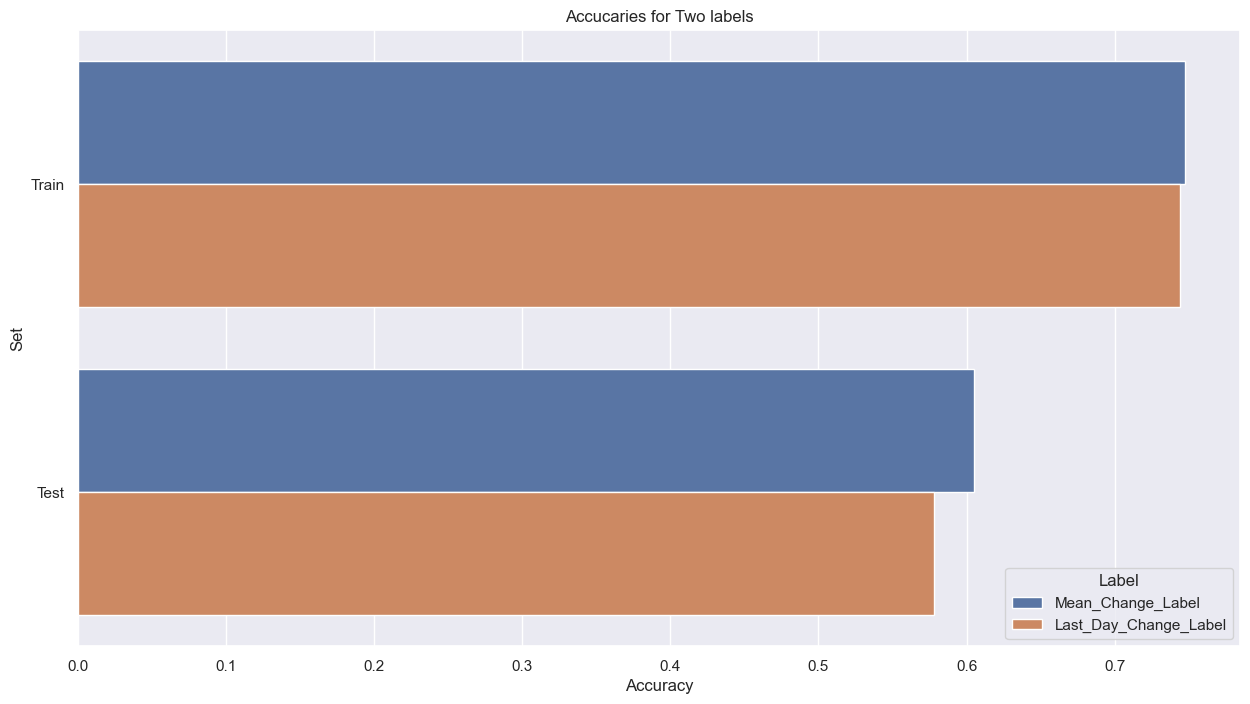

,Accuracy,Set,Label
0,0.747473,Train,Mean_Change_Label
1,0.605067,Test,Mean_Change_Label
2,0.744325,Train,Last_Day_Change_Label
3,0.578241,Test,Last_Day_Change_Label


In [15]:
# Logistic
Accuracies(accu_tr_Logistic_1,accu_te_Logistic_1,accu_tr_Logistic_2,accu_te_Logistic_2)

##### NB

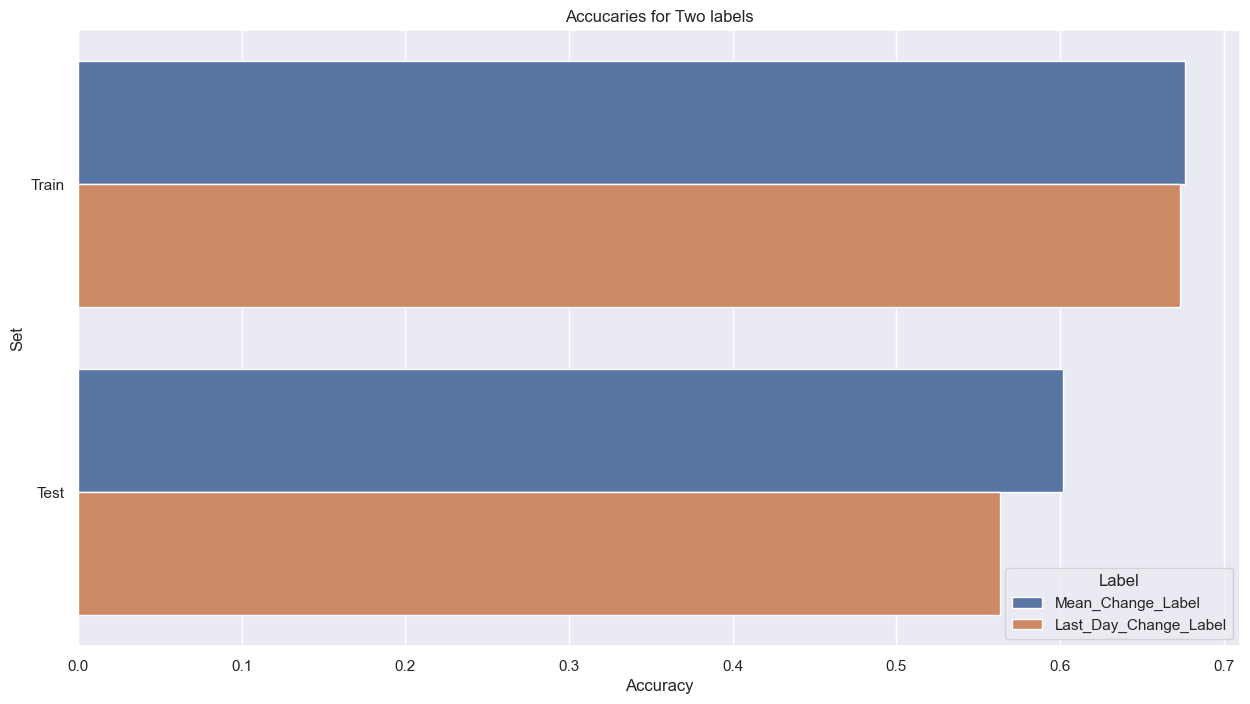

,Accuracy,Set,Label
0,0.676388,Train,Mean_Change_Label
1,0.602086,Test,Mean_Change_Label
2,0.673239,Train,Last_Day_Change_Label
3,0.563338,Test,Last_Day_Change_Label


In [16]:
Accuracies(accu_tr_1,accu_te_1,accu_tr_2,accu_te_2)

### F1-Score

In [17]:
def f1_score(f1_tr_1,f1_te_1,f1_tr_2,f1_te_2):
    f1_df = pd.DataFrame([[f1_tr_1,f1_te_1,f1_tr_2,f1_te_2],
        ['Train','Test','Train','Test'],\
        ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
        ]).T
    f1_df = f1_df.rename(columns={0:'F1-Score',1:'Set',2:'Label'})
    sns.barplot(data=f1_df, x='F1-Score',y='Set',hue='Label').set_title('F1-Scores for Two labels')
    plt.show()
    return(f1_df)

##### Logistic

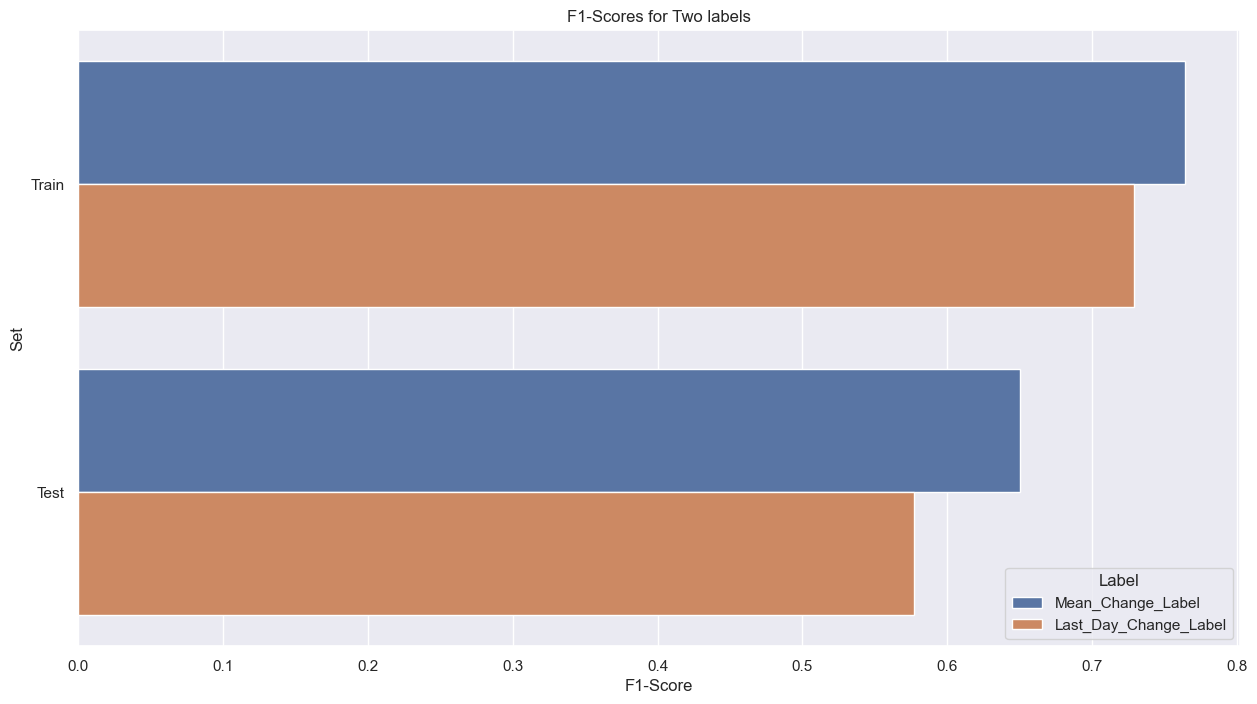

,F1-Score,Set,Label
0,0.764014,Train,Mean_Change_Label
1,0.649934,Test,Mean_Change_Label
2,0.72887,Train,Last_Day_Change_Label
3,0.576981,Test,Last_Day_Change_Label


In [18]:
f1_score(f1_tr_Logistic_1,f1_te_Logistic_1,f1_tr_Logistic_2,f1_te_Logistic_2)

##### NB

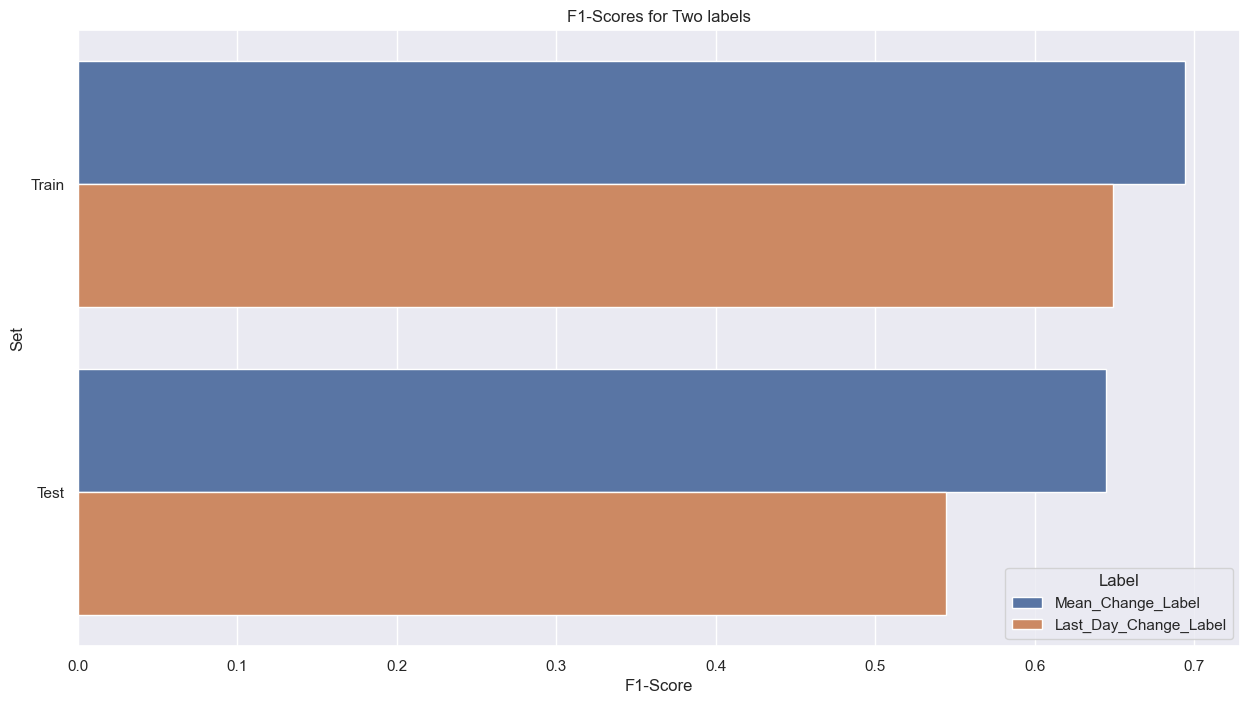

,F1-Score,Set,Label
0,0.694127,Train,Mean_Change_Label
1,0.644474,Test,Mean_Change_Label
2,0.64886,Train,Last_Day_Change_Label
3,0.544323,Test,Last_Day_Change_Label


In [19]:
f1_score(f1_tr_1,f1_te_1,f1_tr_2,f1_te_2)

### AUC_ROC Score

In [20]:
def roc_df(roc_tr_1,roc_te_1,roc_tr_2,roc_te_2):
    roc_df = pd.DataFrame([[roc_tr_1,roc_te_1,roc_tr_2,roc_te_2],
        ['Train','Test','Train','Test'],\
        ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
        ]).T
    roc_df = roc_df.rename(columns={0:'AUC_ROC-Score',1:'Set',2:'Label'})
    sns.barplot(data=roc_df, x='AUC_ROC-Score',y='Set',hue='Label').set_title('AUC_ROC-Scores for Two labels')
    plt.show()
    return(roc_df)

##### Logistic

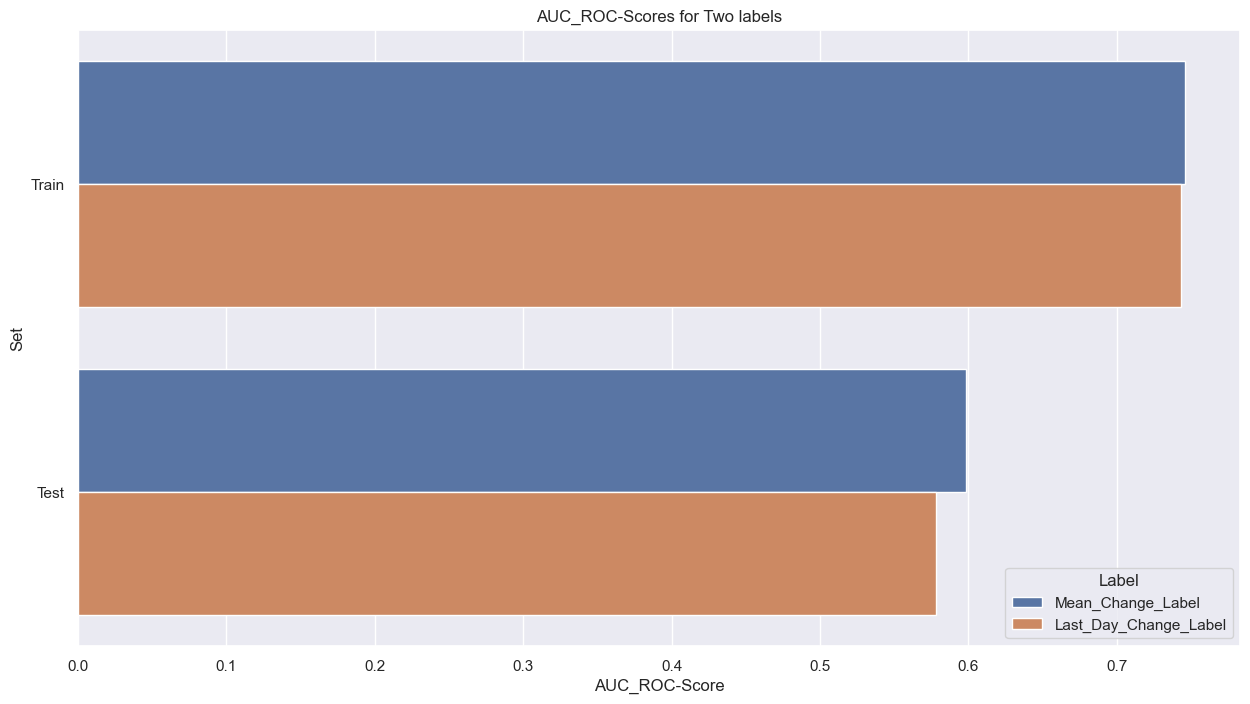

,AUC_ROC-Score,Set,Label
0,0.74594,Train,Mean_Change_Label
1,0.598215,Test,Mean_Change_Label
2,0.743295,Train,Last_Day_Change_Label
3,0.578348,Test,Last_Day_Change_Label


In [21]:
roc_df(roc_tr_Logistic_1,roc_te_Logistic_1,roc_tr_Logistic_2,roc_te_Logistic_2)

##### NB

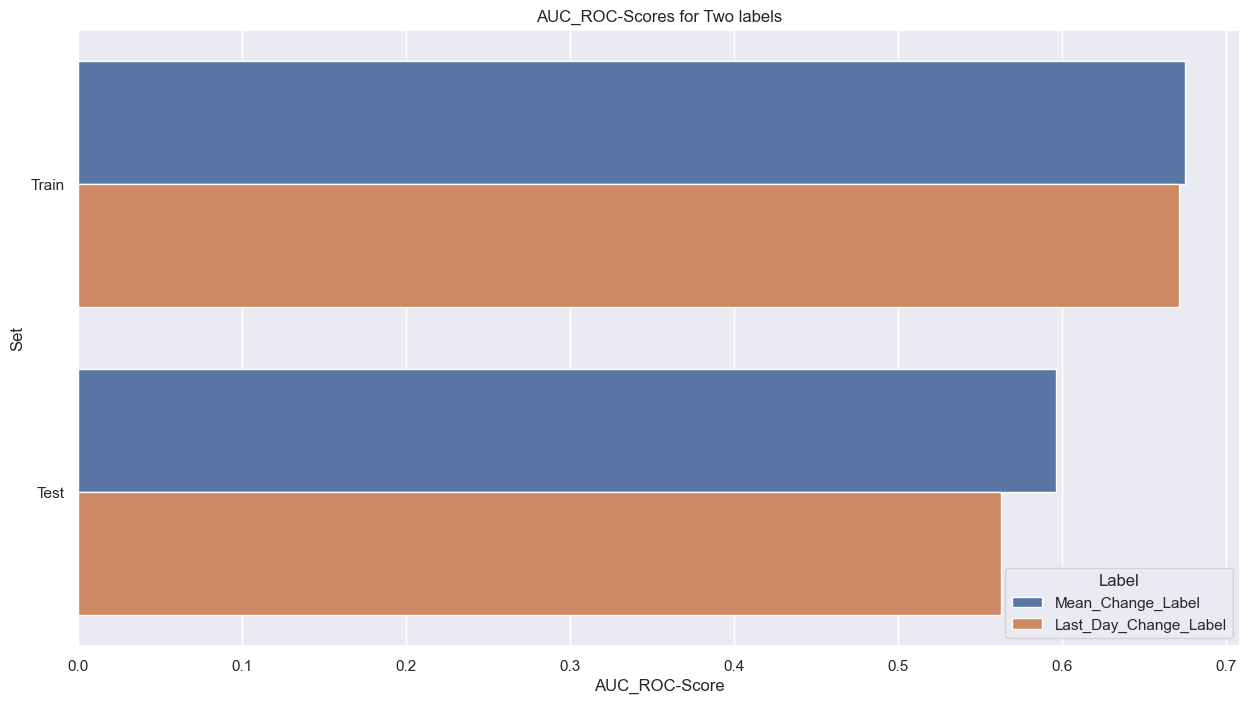

,AUC_ROC-Score,Set,Label
0,0.675189,Train,Mean_Change_Label
1,0.596209,Test,Mean_Change_Label
2,0.671456,Train,Last_Day_Change_Label
3,0.562805,Test,Last_Day_Change_Label


In [22]:
roc_df(roc_tr_1,roc_te_1,roc_tr_2,roc_te_2)

### Confusion Matrices

In [23]:
sns.set(rc={'figure.figsize':(10,8)})

##### Logistic

[Text(0.5, 1.0, 'CFM for Train Mean_Change_Label')]

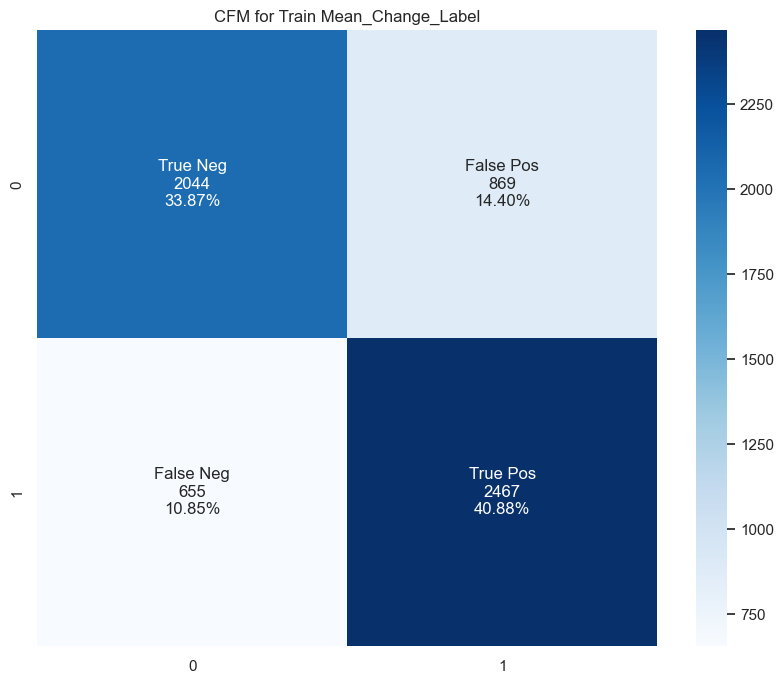

In [24]:
plot_matrix(y_train_1,y_pred_tr_Logistic_1,'CFM for Train Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Mean_Change_Label')]

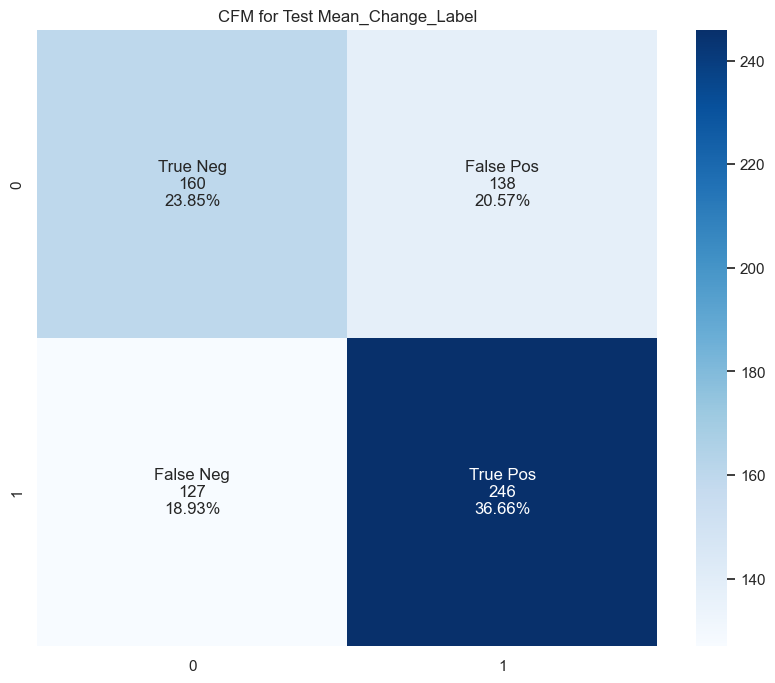

In [25]:
plot_matrix(y_test_1,y_pred_te_Logistic_1,'CFM for Test Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Train Last_Day_Change_Label')]

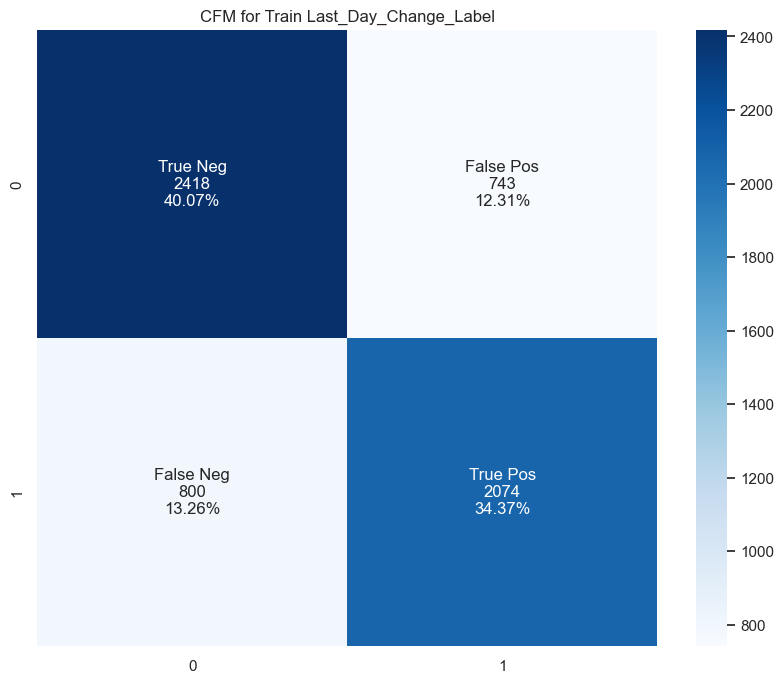

In [26]:
plot_matrix(y_train_2,y_pred_tr_Logistic_2,'CFM for Train Last_Day_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Last_Day_Change_Label')]

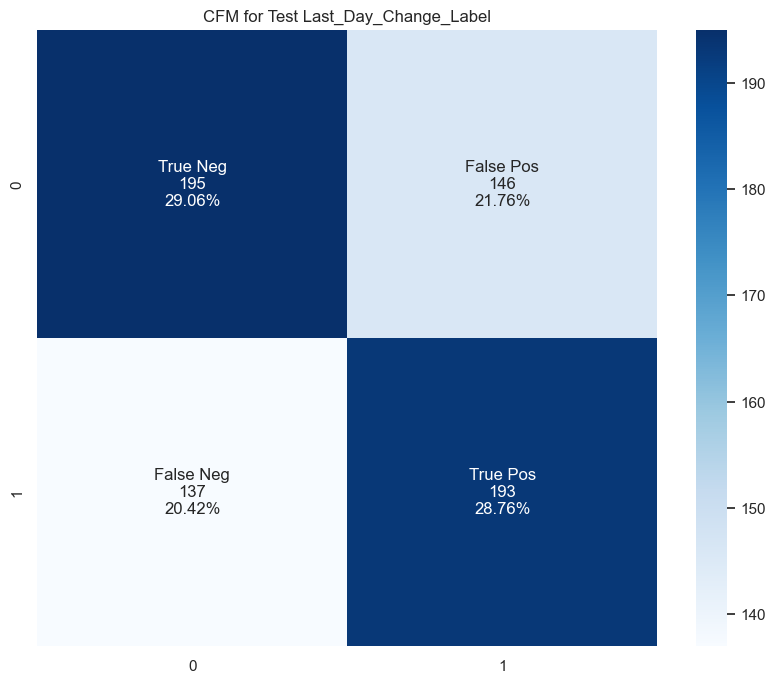

In [27]:
plot_matrix(y_test_2,y_pred_te_Logistic_2,'CFM for Test Last_Day_Change_Label')

##### NB

[Text(0.5, 1.0, 'CFM for Train Mean_Change_Label')]

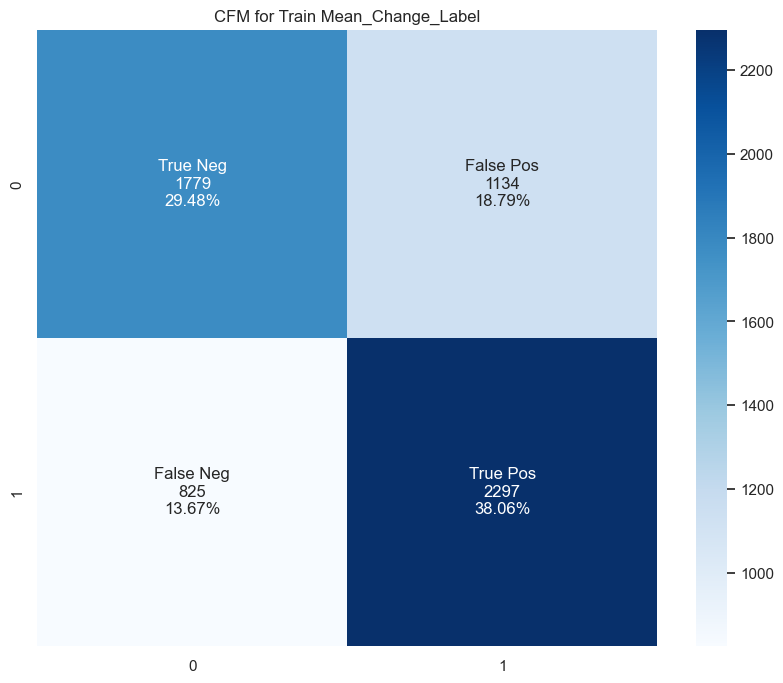

In [50]:
plot_matrix(y_train_1,y_pred_tr_1,'CFM for Train Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Mean_Change_Label')]

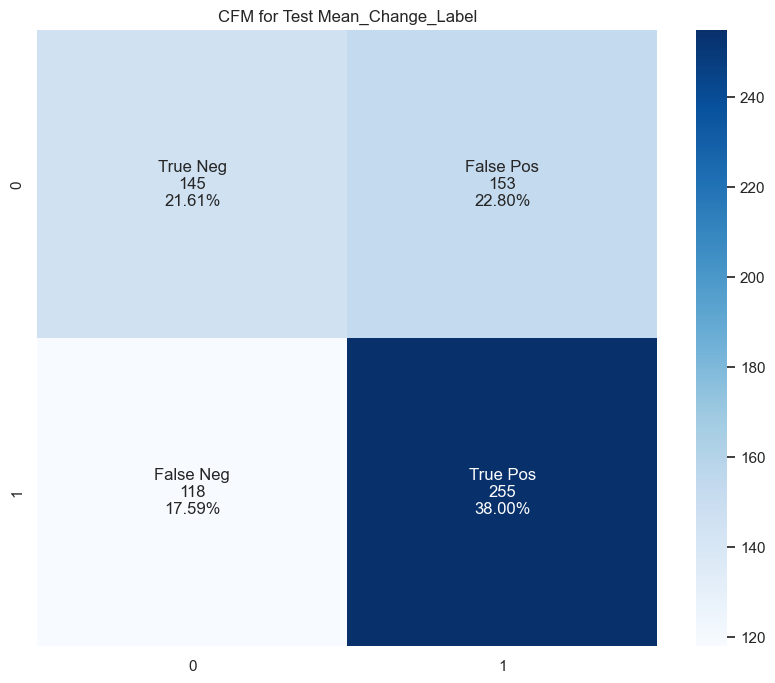

In [51]:
plot_matrix(y_test_1,y_pred_te_1,'CFM for Test Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Train Last_Day_Change_Label')]

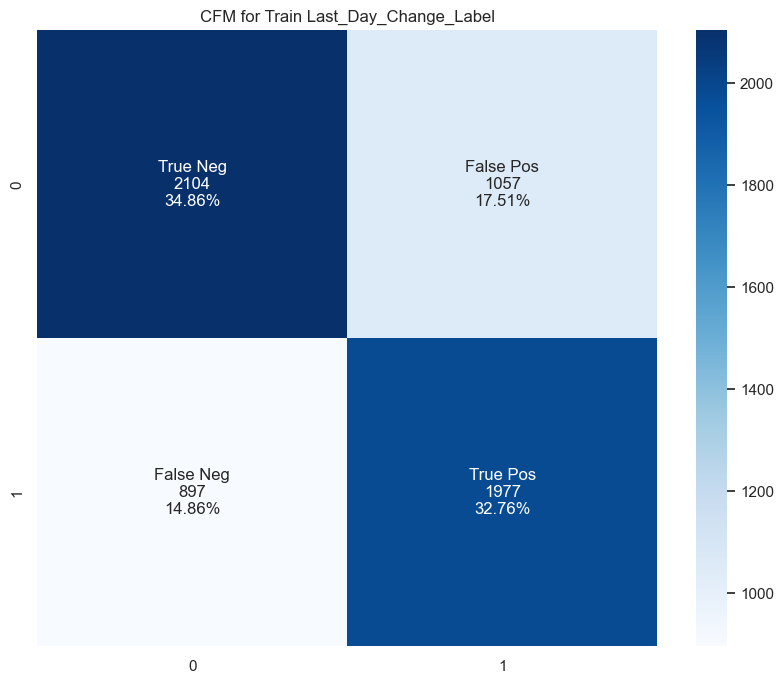

In [52]:
plot_matrix(y_train_2,y_pred_tr_2,'CFM for Train Last_Day_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Last_Day_Change_Label')]

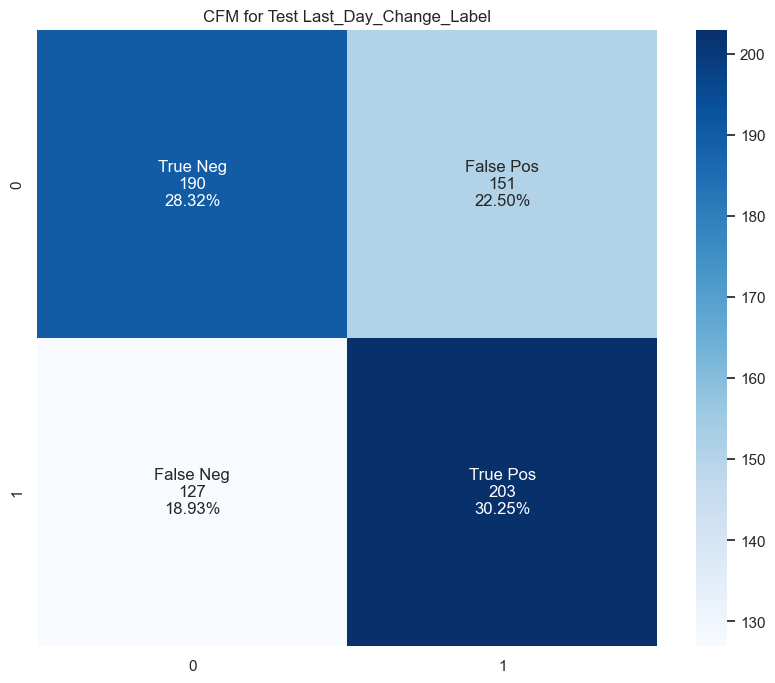

In [53]:
plot_matrix(y_test_2,y_pred_te_2,'CFM for Test Last_Day_Change_Label')

### S&P 500

In [28]:
sns.set(rc={'figure.figsize':(15,8)})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_sp500,test_size=0.10, random_state=1)

In [30]:
y_train_1 = y_train.iloc[:,0]
y_train_2 = y_train.iloc[:,1]

y_test_1 = y_test.iloc[:,0]
y_test_2 = y_test.iloc[:,1]

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model1_Logistic = LogisticRegression(max_iter=1000)
model1_Logistic.fit(X_train, y_train_1)
y_pred_tr_Logistic_1 = model1_Logistic.predict(X_train)
y_pred_te_Logistic_1 = model1_Logistic.predict(X_test)

accu_tr_Logistic_1 = metrics.accuracy_score(y_train_1, y_pred_tr_Logistic_1)
accu_te_Logistic_1 = metrics.accuracy_score(y_test_1, y_pred_te_Logistic_1)

f1_tr_Logistic_1 = metrics.f1_score(y_train_1, y_pred_tr_Logistic_1)
f1_te_Logistic_1 = metrics.f1_score(y_test_1, y_pred_te_Logistic_1)

roc_tr_Logistic_1 = metrics.roc_auc_score(y_train_1, y_pred_tr_Logistic_1)
roc_te_Logistic_1 = metrics.roc_auc_score(y_test_1, y_pred_te_Logistic_1)

In [32]:
model2_Logistic = LogisticRegression(max_iter=1000)
model2_Logistic.fit(X_train, y_train_2)
y_pred_tr_Logistic_2 = model2_Logistic.predict(X_train)
y_pred_te_Logistic_2 = model2_Logistic.predict(X_test)

accu_tr_Logistic_2 = metrics.accuracy_score(y_train_2, y_pred_tr_Logistic_2)
accu_te_Logistic_2 = metrics.accuracy_score(y_test_2, y_pred_te_Logistic_2)

f1_tr_Logistic_2 = metrics.f1_score(y_train_2, y_pred_tr_Logistic_2)
f1_te_Logistic_2 = metrics.f1_score(y_test_2, y_pred_te_Logistic_2)

roc_tr_Logistic_2 = metrics.roc_auc_score(y_train_2, y_pred_tr_Logistic_2)
roc_te_Logistic_2 = metrics.roc_auc_score(y_test_2, y_pred_te_Logistic_2)

## NB

In [33]:
model1 = MultinomialNB()
model1.fit(X_train, y_train_1)
y_pred_tr_1 = model1.predict(X_train)
y_pred_te_1 = model1.predict(X_test)

accu_tr_1 = metrics.accuracy_score(y_train_1, y_pred_tr_1)
accu_te_1 = metrics.accuracy_score(y_test_1, y_pred_te_1)

f1_tr_1 = metrics.f1_score(y_train_1, y_pred_tr_1)
f1_te_1 = metrics.f1_score(y_test_1, y_pred_te_1)

roc_tr_1 = metrics.roc_auc_score(y_train_1, y_pred_tr_1)
roc_te_1 = metrics.roc_auc_score(y_test_1, y_pred_te_1)

In [34]:
model2 = MultinomialNB()
model2.fit(X_train, y_train_2)
y_pred_tr_2 = model2.predict(X_train)
y_pred_te_2 = model2.predict(X_test)

accu_tr_2 = metrics.accuracy_score(y_train_2, y_pred_tr_2)
accu_te_2 = metrics.accuracy_score(y_test_2, y_pred_te_2)

f1_tr_2 = metrics.f1_score(y_train_2, y_pred_tr_2)
f1_te_2 = metrics.f1_score(y_test_2, y_pred_te_2)

roc_tr_2 = metrics.roc_auc_score(y_train_2, y_pred_tr_2)
roc_te_2 = metrics.roc_auc_score(y_test_2, y_pred_te_2)

#### Accuracies

##### Logistic

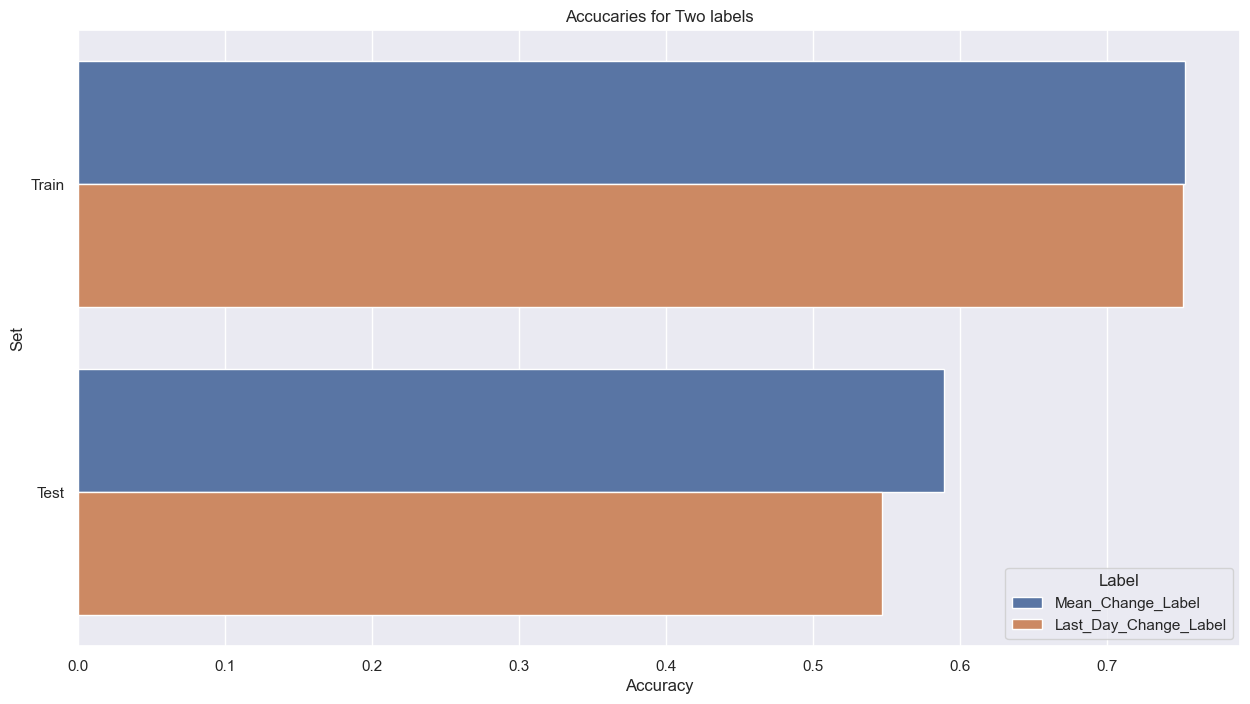

,Accuracy,Set,Label
0,0.752775,Train,Mean_Change_Label
1,0.588674,Test,Mean_Change_Label
2,0.75145,Train,Last_Day_Change_Label
3,0.546945,Test,Last_Day_Change_Label


In [35]:
# Logistic
Accuracies(accu_tr_Logistic_1,accu_te_Logistic_1,accu_tr_Logistic_2,accu_te_Logistic_2)

##### NB

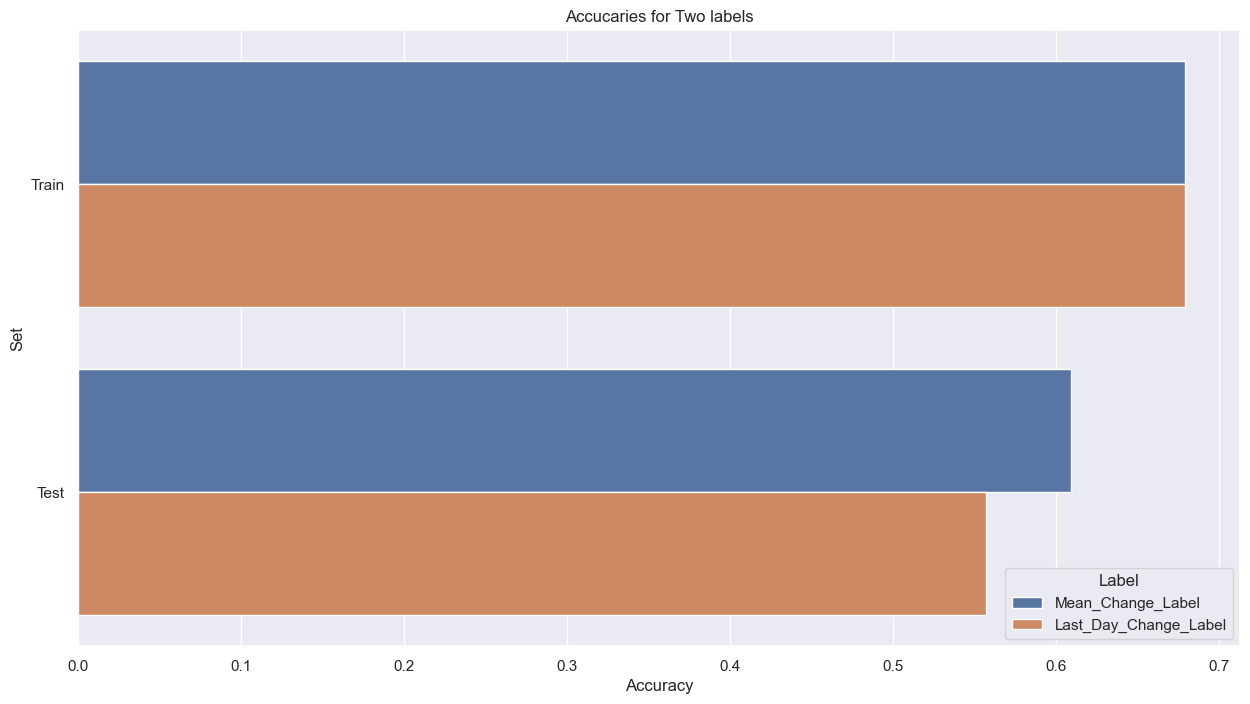

,Accuracy,Set,Label
0,0.679039,Train,Mean_Change_Label
1,0.609538,Test,Mean_Change_Label
2,0.679205,Train,Last_Day_Change_Label
3,0.557377,Test,Last_Day_Change_Label


In [36]:
Accuracies(accu_tr_1,accu_te_1,accu_tr_2,accu_te_2)

### F1-Score

##### Logistic

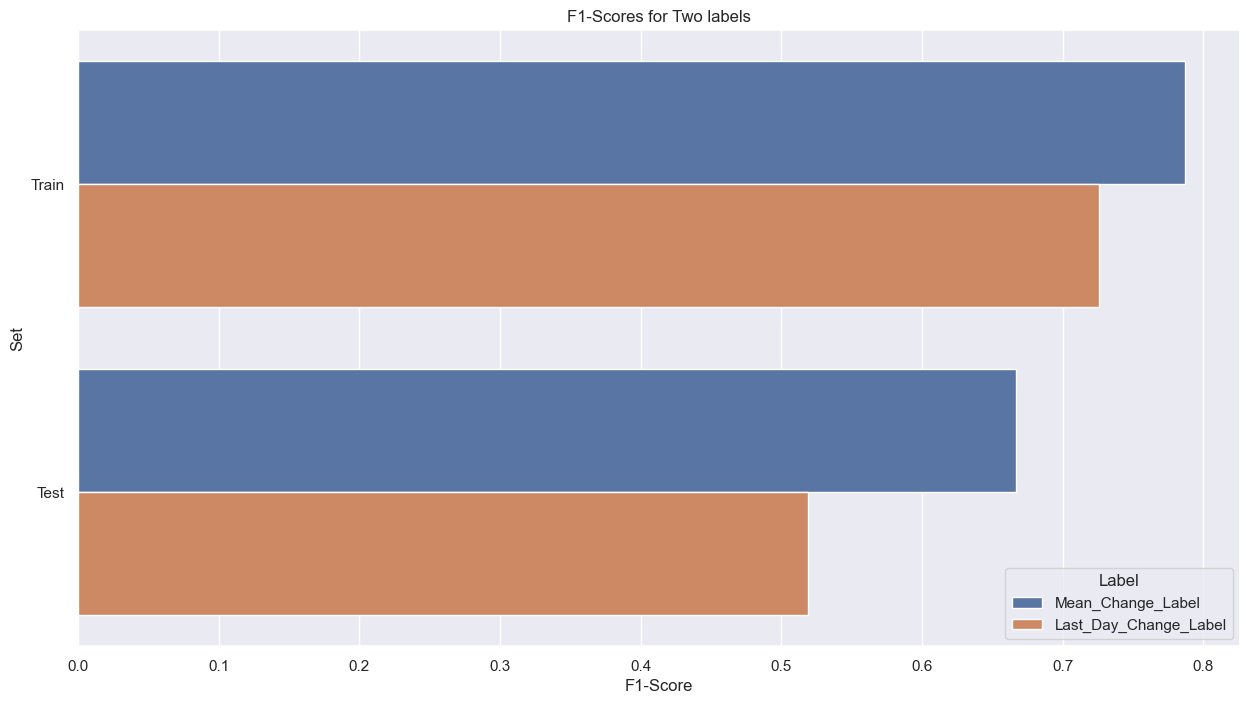

,F1-Score,Set,Label
0,0.786979,Train,Mean_Change_Label
1,0.666667,Test,Mean_Change_Label
2,0.726177,Train,Last_Day_Change_Label
3,0.518987,Test,Last_Day_Change_Label


In [37]:
f1_score(f1_tr_Logistic_1,f1_te_Logistic_1,f1_tr_Logistic_2,f1_te_Logistic_2)

##### NB

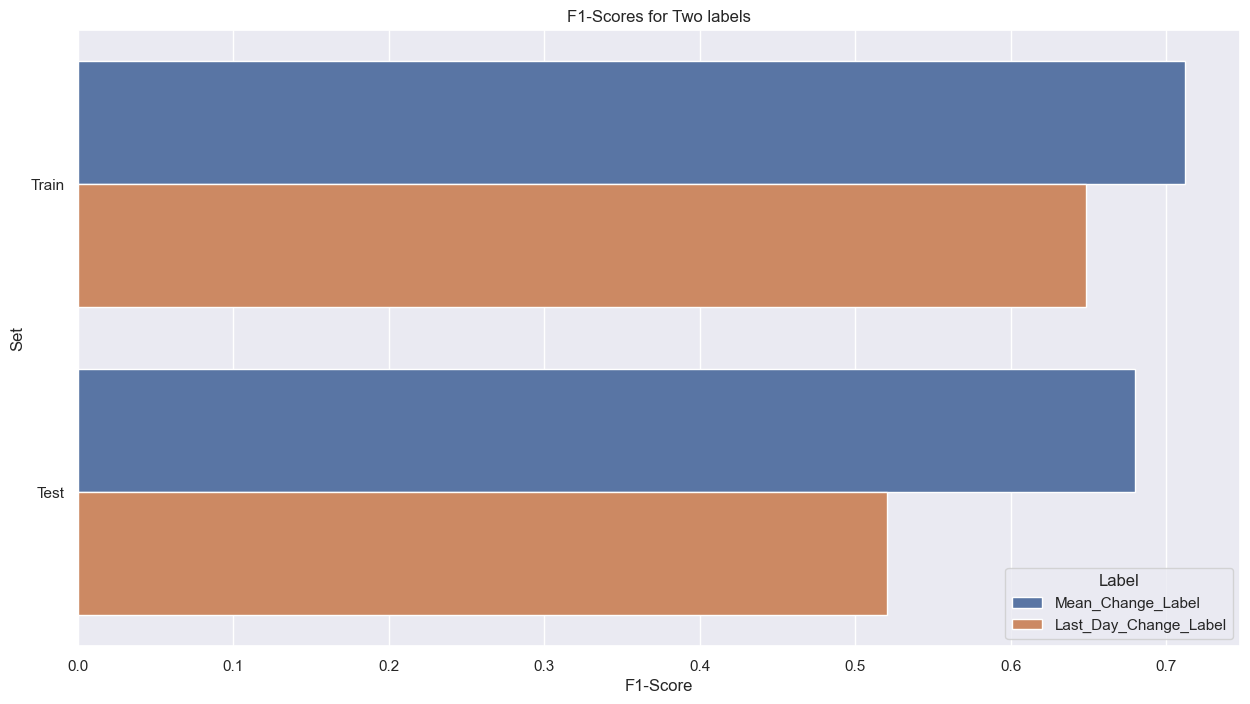

,F1-Score,Set,Label
0,0.712056,Train,Mean_Change_Label
1,0.679707,Test,Mean_Change_Label
2,0.648256,Train,Last_Day_Change_Label
3,0.520194,Test,Last_Day_Change_Label


In [38]:
f1_score(f1_tr_1,f1_te_1,f1_tr_2,f1_te_2)

#### AUC_ROC Score

##### Logistic

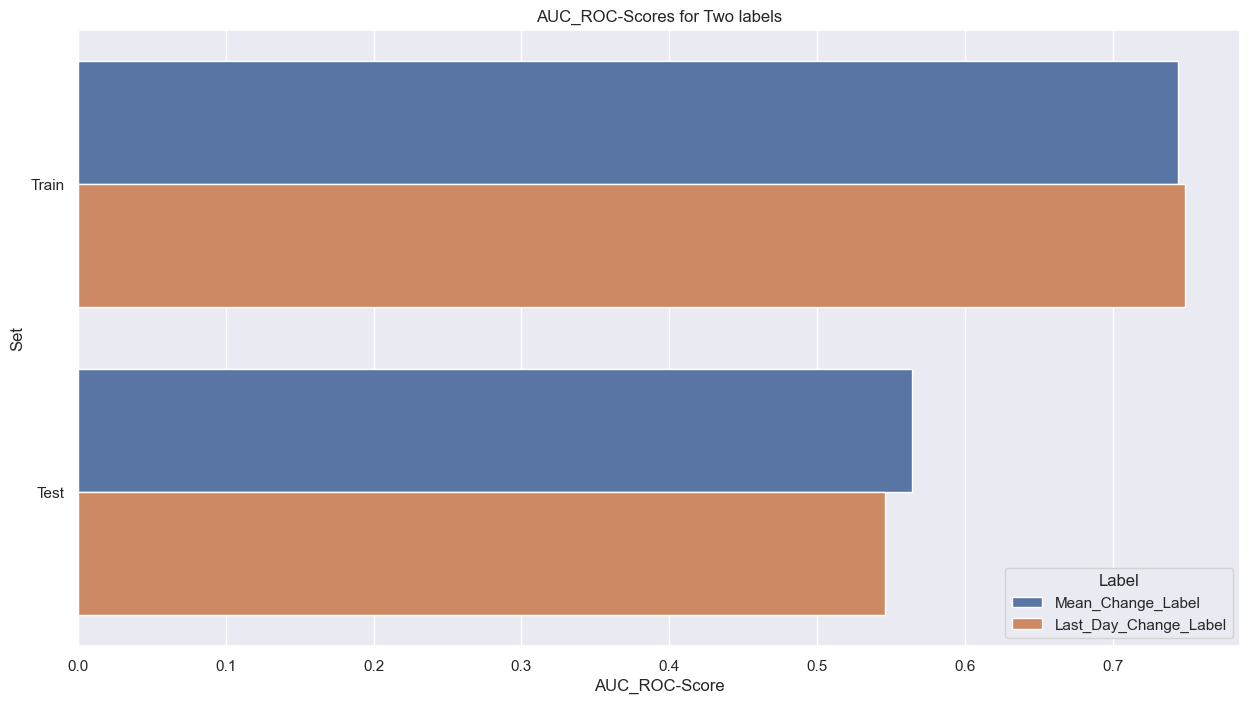

,AUC_ROC-Score,Set,Label
0,0.74413,Train,Mean_Change_Label
1,0.564425,Test,Mean_Change_Label
2,0.748721,Train,Last_Day_Change_Label
3,0.546056,Test,Last_Day_Change_Label


In [39]:
roc_df(roc_tr_Logistic_1,roc_te_Logistic_1,roc_tr_Logistic_2,roc_te_Logistic_2)

##### NB

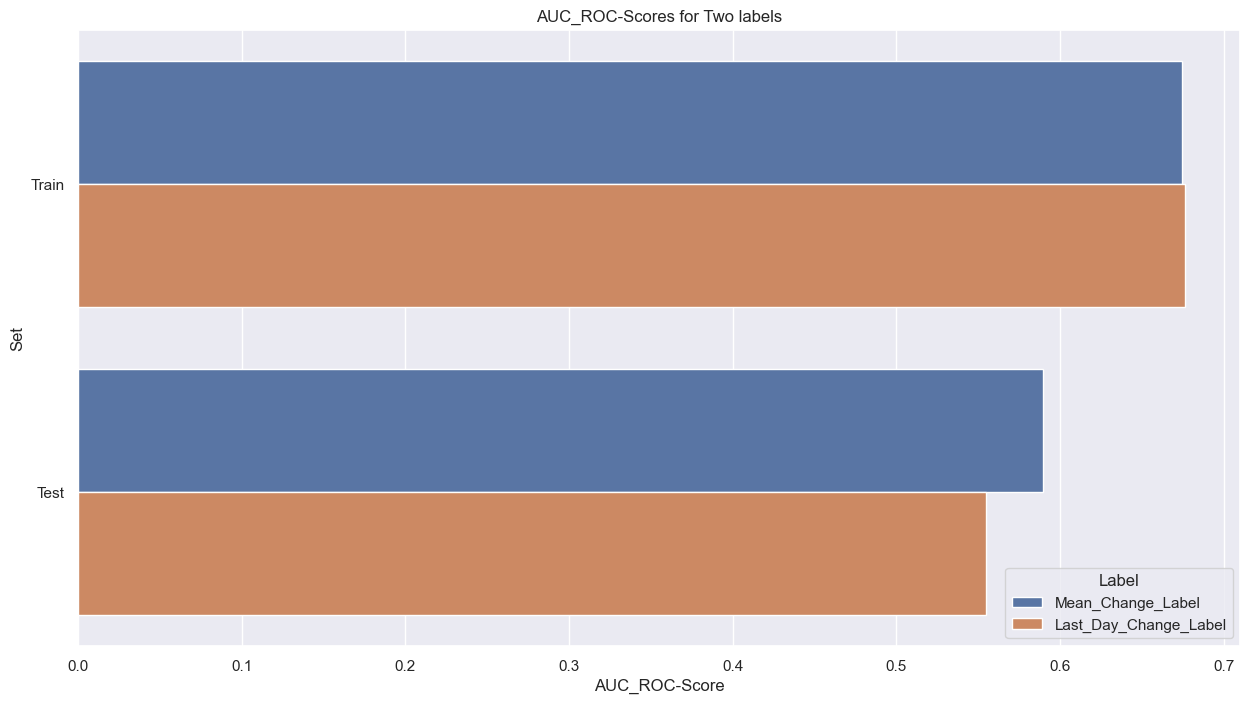

,AUC_ROC-Score,Set,Label
0,0.674389,Train,Mean_Change_Label
1,0.58945,Test,Mean_Change_Label
2,0.676398,Train,Last_Day_Change_Label
3,0.554853,Test,Last_Day_Change_Label


In [40]:
roc_df(roc_tr_1,roc_te_1,roc_tr_2,roc_te_2)

#### Confusion Matrices

In [41]:
sns.set(rc={'figure.figsize':(10,8)})

##### Logistic

[Text(0.5, 1.0, 'CFM for Train Mean_Change_Label')]

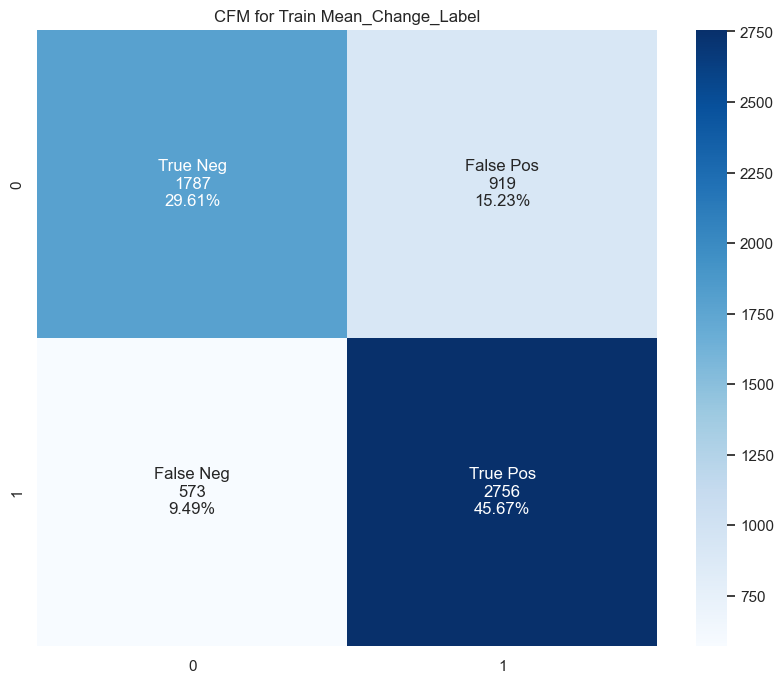

In [42]:
plot_matrix(y_train_1,y_pred_tr_Logistic_1,'CFM for Train Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Mean_Change_Label')]

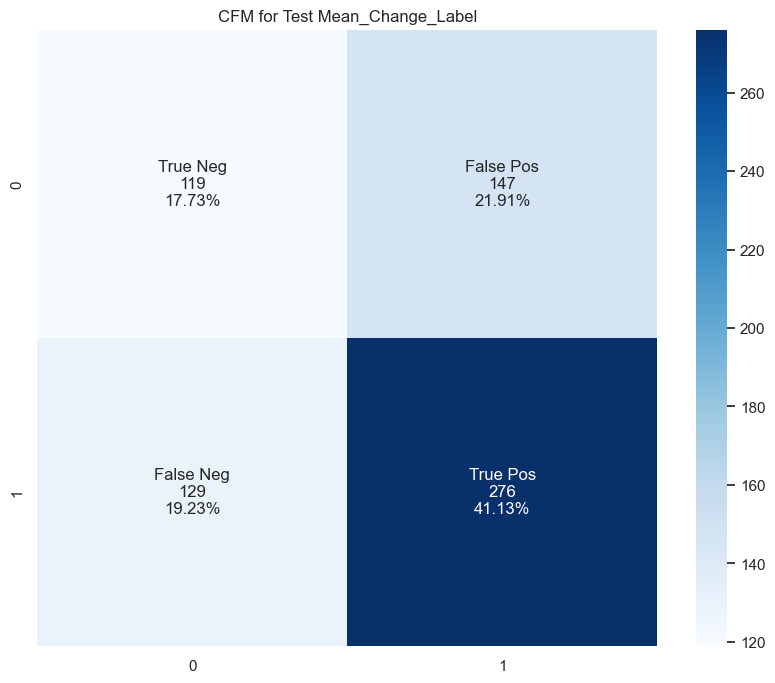

In [43]:
plot_matrix(y_test_1,y_pred_te_Logistic_1,'CFM for Test Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Train Last_Day_Change_Label')]

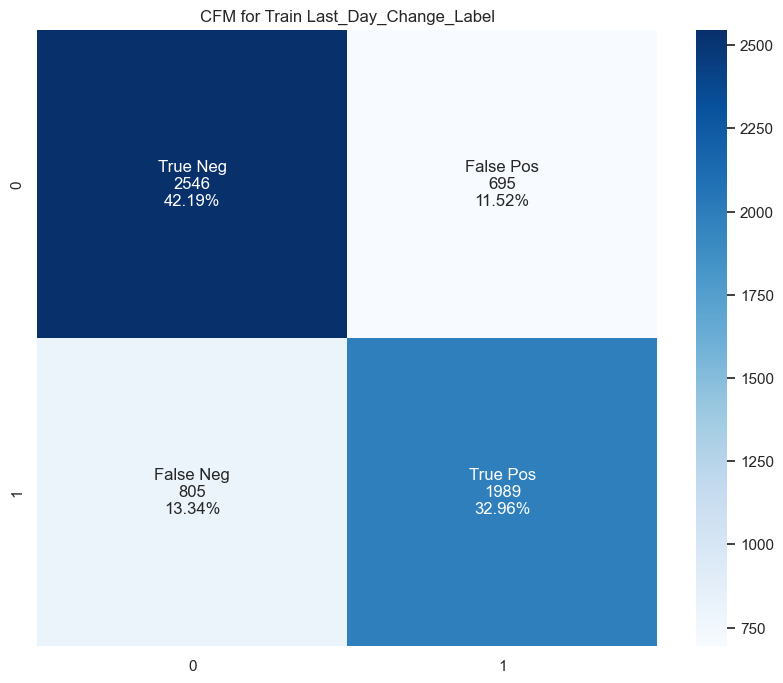

In [44]:
plot_matrix(y_train_2,y_pred_tr_Logistic_2,'CFM for Train Last_Day_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Last_Day_Change_Label')]

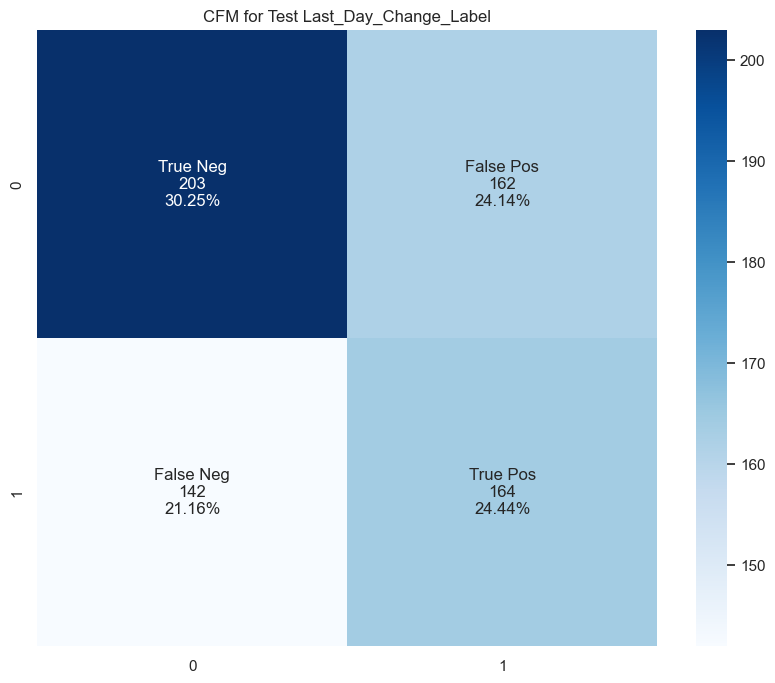

In [45]:
plot_matrix(y_test_2,y_pred_te_Logistic_2,'CFM for Test Last_Day_Change_Label')

##### NB

[Text(0.5, 1.0, 'CFM for Train Mean_Change_Label')]

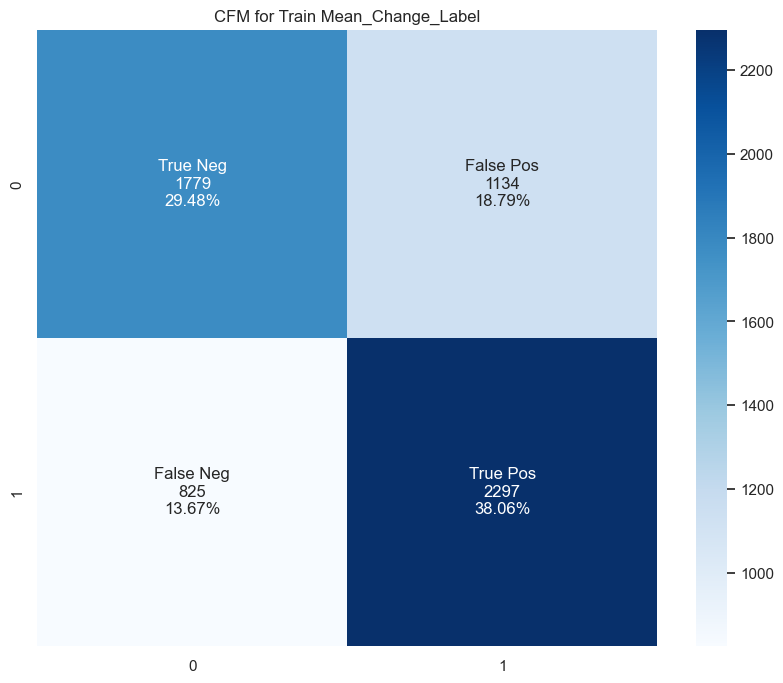

In [87]:
plot_matrix(y_train_1,y_pred_tr_1,'CFM for Train Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Mean_Change_Label')]

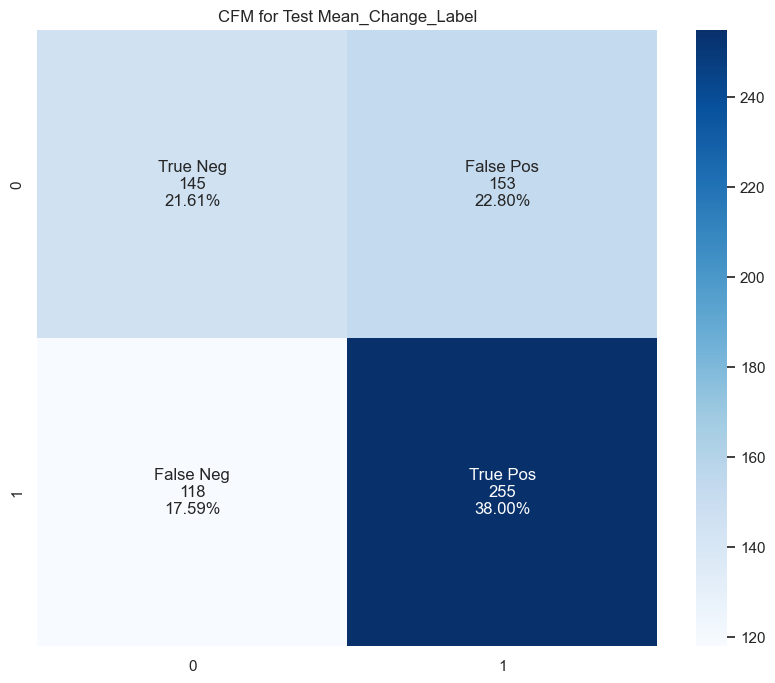

In [88]:
plot_matrix(y_test_1,y_pred_te_1,'CFM for Test Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Train Last_Day_Change_Label')]

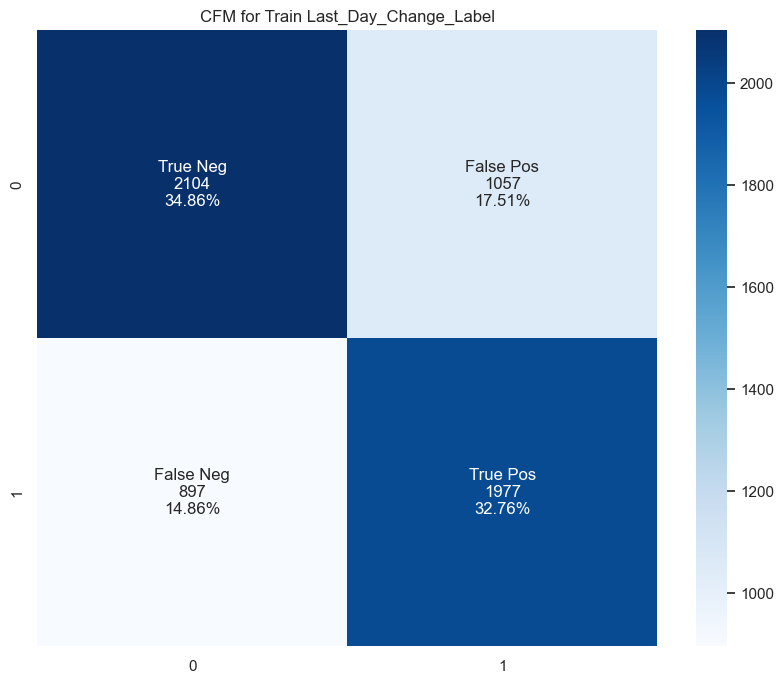

In [89]:
plot_matrix(y_train_2,y_pred_tr_2,'CFM for Train Last_Day_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Last_Day_Change_Label')]

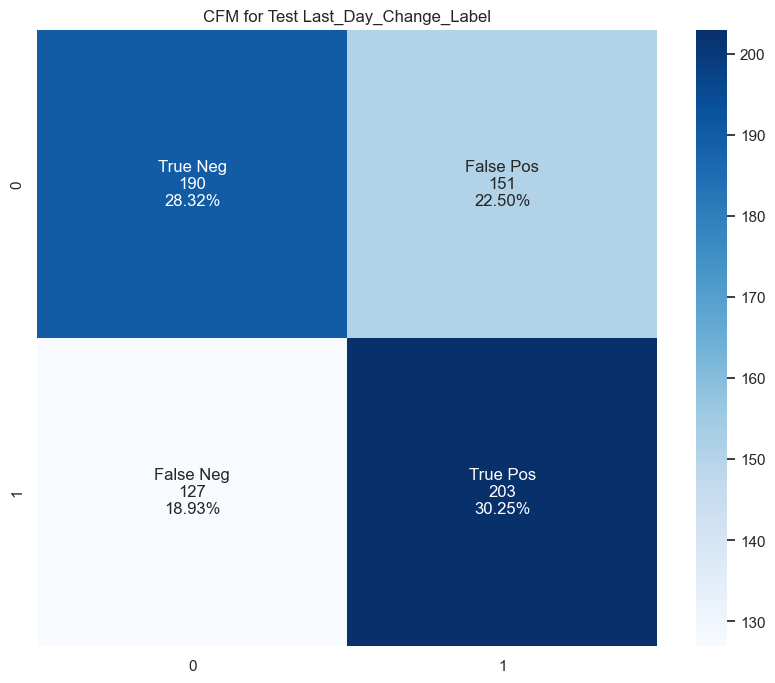

In [90]:
plot_matrix(y_test_2,y_pred_te_2,'CFM for Test Last_Day_Change_Label')